# 5. Principle Component Analysis

클러스터링이 근접성으로 데이터를 나눴다면, **PCA는 분산에 따라 데이터를 나눈 것**이다. **PCA는 데이터 내의 중요한 관계와 유용한 특성을 찾을 수 있도록 도와준다.**  
- PCA는 표준화된 데이터를 적용한다. 
    - 표준화된 데이터에서 `Variation`은 `Correlation`을 의미한다.
    - 표준화되지 않은 데이터에서 `Variation`은 `Covariance`를 의미한다.

![7](Images/7.png)
- 껍질의 높이와 직경이라는 2가지 축이 있다고 생각해보자.
- 데이터 내에 서로 다른 경향을 나타내는 2가지 축이 있다고 생각할 수 있다.   

$Size = 0.707 \times Height + 0.707 \times Diameter$  
$Shape = 0.707 \times Height - 0.707 \times Diameter$

**PCA의 핵심은, 데이터를 원래 축**(Height, Diameter)**으로 설명하는 대신 변동 축**(Shape, Size)**으로 설명하는 것이다.**
- 이 때 새로운 변동 축들은 원래 축들의 선형 결합으로 설명할 수 있다.
    - 이 선형 결합에서 원래 피쳐 각각의 가중치를 `Loading`이라고 한다.
- 이러한 **새로운 변동 축을 주성분**(Principle Components)이라고 한다.

PCA는 또한 각 성분의 변동량을 알려준다. 위 그림에서 Height에 따른 분산이 Diameter에 따른 분산보다 큼을 알 수 있다
- 이해되지 않는다면 데이터가 Size에 길게 걸쳐 있는지 Shape에 길게 걸쳐 있는지 보자 : Size 축에 길게 걸쳐 있죠?  

**PCA는 `Percent Of Experienced Variance`라는 값을 통해 각 성분이 분산(`variance`)에 얼마나 기여하는지 볼 수 있다.**
![8](Images/8.png)  
- `Size` 값이 `Height`와 `Diameter` 사이의 분산에서 96%를 차지함을 알 수 있다.
- 그러나 **분산이 예측 변수로서 얼마나 우수한지를 반드시 의미하는 건 아니다** : 예측 내용에 따라 다름

## 특성 공학을 위한 PCA

- 2가지 방법이 있다. (성분 : Component)
1. **성분이 분산을 알려주므로, 성분에 대한 MI 점수를 확인한 다음 목표값을 예측할 수 있는 변동의 종류를 확인할 수 있다.** 점수가 높은 요소에 대한 클러스터링을 시도할 수도 있고, 새로운 특성을 만들어내는 아이디어로 쓸 수도 있다.
2. **성분 자체를 특성으로 사용할 수 있다.** 데이터의 분산을 가장 잘 나타내기 때문에 원래 특성보다 유용할 수 있다. 
    - 차원 축소 : PCA는 중복된 기능 중 하나 이상을 반드시 0에 가까운 성분으로 분할한다. 이러한 성분을 자연스럽게 지울 수 있다.
    - 이상 감지 : 분명하지 않은 비정상적 변동은 종종 저분산 성분에서 나타난다. 이상 징후나 특이치 감지 작업에서 유용한 경우가 많다.
    - 노이즈 감소 : 센서는 노이즈를 받아들이곤 하는데, PCA를 통해 노이즈를 유지하면서 더 유용한 정보를 수집할 수 있다. 따라서 신호 : 잡음 비율을 높일 수 있다.
    - 상관성 분해 : PCA는 상관성(Correlation)이 있는 기능을 상관성이 없는 요소로 분할하므로, 알고리즘 작업을 더 쉽게 할 수 있다.


- PCA는 데이터의 상관 구조에 직접적으로 접근할 수 있게 하므로, 안 쓸 이유가 없음

### PCA 사용을 위한 팁
- PCA는 연속변수에만 사용가능함
- PCA는 스케일링에 민감함 
- 이상치는 결과에 과도한 영향을 미칠 수 있다. 이상치를 제거하거나 제한하는 것을 염두에 두자.

## 예제

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width = 8, dpi = 100):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n+1)
    
    # Explained Variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel = 'Component', title = '% Explained Variance', ylim = (0.0, 1.0))
    
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], 'o-')
    axs[1].set(xlabel = 'Component', title = '% Cumulative Variance', ylim = (0.0, 1.0))
    
    fig.set(figwidth = 8, dpi = 100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


df = pd.read_csv('data/autos.csv')

In [3]:
features = ['highway_mpg', 'engine_size', 'horsepower', 'curb_weight']

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# standardized
X_scaled = ((X - X.mean(axis = 0)) / X.std(axis = 0))

In [9]:
X_scaled.head(5)

,highway_mpg,engine_size,horsepower,curb_weight
0,-0.555613,0.045098,0.198054,-0.025646
1,-0.555613,0.045098,0.198054,-0.025646
2,-0.702307,0.574066,1.330822,0.496473
3,-0.115531,-0.459826,-0.039037,-0.426254
4,-1.289083,0.189362,0.303427,0.498371


In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = component_names)

X_pca.head() # 이거 자체로는 각 주성분에 대해 row가 갖는 값이 뭔지 모르겠음

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


- PCA는 `components_` 속성에 `loading` 값을 포함하고 있다.(용어의 일관성이 없긴 하다)
- **제일 중요**하게 볼 수 있는 부분이기도 하다

In [11]:
loading = pd.DataFrame(
                        pca.components_.T, # loading 행렬 Transpose
                        columns = component_names, # 각 열은 주성분
                        index = X.columns # row는 원래 피쳐들
)
loading

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

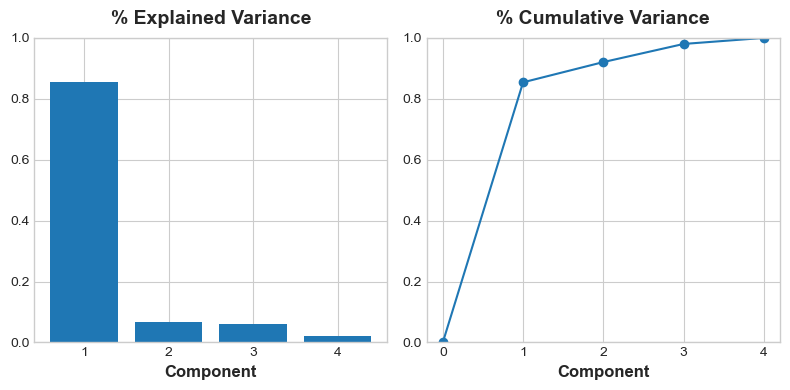

In [12]:
plot_variance(pca)

#### MI 스코어 보기

In [13]:
mi_scores = make_mi_scores(X_pca, y, discrete_features = False)
mi_scores

PC1    1.012645
PC2    0.379690
PC3    0.307087
PC4    0.204842
Name: MI Scores, dtype: float64

- 위에서 loading에 대한 함수를 봤을 때 주성분3(PC3)은 `horsepower`와 `curb_weight` 간의 대조를 보임
- 이걸 한 번 살펴보자

In [14]:
idx = X_pca['PC3'].sort_values(ascending = False).index
cols = ['make', 'body_style', 'horsepower', 'curb_weight']
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
117,porsche,hardtop,207,2756
118,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


- 대조를 보고 싶다면 ratio feature를 만들어보면 된다.

<AxesSubplot:xlabel='sports_or_wagon', ylabel='price'>

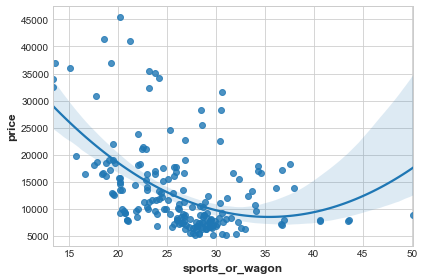

In [19]:
df['sports_or_wagon'] = X.curb_weight / X.horsepower
sns.regplot(x = 'sports_or_wagon', y = 'price', data = df, order = 2)

## 실습 중 유용한 것들

**1. 판다스에 이런 것도 있음 - 각 column과 타겟 값의 관계**

```python
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print(df[features].corrwith(df.SalePrice)) # 이것만 봐
```

**2. PCA 분석 후 주성분과 Loading과의 관계 보기**
- 코드는 위에서 썼던 이걸 가져가면 되겠다
```python
loading = pd.DataFrame(
                        pca.components_.T, # loading 행렬 Transpose
                        columns = component_names, # 각 열은 주성분
                        index = X.columns # row는 원래 피쳐들
)
```

### PCA 분석을 통해 할 것 : 이 질문의 목표는 PCA 결과를 사용하여 모델의 성능을 향상시키는 하나 이상의 새로운 기능을 발견하는 것입니다.

- 이게 위의 본문에서도 한 내용인데, 크게 2가지로 나뉨

#### 1. MI 스코어를 활용해 새로운 feature를 만듦
- MI 스코어에서 좋은 값을 지니는 주성분이 있을 거임
- 또한 각 주성분의 구성은 `Loading` 행렬에서 어떤 피쳐가 어떤 가중치로 들어갔는지 볼 수 있음
- 이 특성들을 선형결합(`+`나 `*`)을 통해 새로운 feature로 만들어주는 방식임

```python
X["Feature1"] = X.GrLivArea + X.TotalBsmtSF 
X["Feature2"] = X.YearRemodAdd * X.TotalBsmtSF 
```

#### 2. `pca.fit_transform()`으로 나온 행렬을 그대로 새로운 특성으로 집어넣어줌

```python
X = X.join(X_pca)
```

### 이상치 탐색도 가능하다고 했다

- **각 주성분과 타겟값에 대해 박스플롯을 그렸을 때 나타나는 이상치**들이 있음
- 예제에서는 `Partial`이라고 하는, 부동산의 일부 소유권만을 매매하는 것을 설명하긴 했는데 솔직히 직접 봤을 때는 잘 모르겠음